<a href="https://colab.research.google.com/github/ahmedashraf792002/DL-Projects/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from nltk.corpus import stopwords
from nltk.stem import ISRIStemmer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LABR.csv',usecols=[1,2])
data.head()

,label,text
0,4,من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...
1,4,رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف ...
2,1,إني أقدّر هذه الرواية كثيرا، لسبب مختلف عن أس...
3,5,الكاهن الذي أطلق على نفسه اسم هيبا تيمنا بالع...
4,5,"""عزازيل"" هو اسم رواية يوسف زيدان الثانية و ال..."


In [4]:
data.shape

(63256, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63256 entries, 0 to 63255
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   63256 non-null  int64 
 1   text    63256 non-null  object
dtypes: int64(1), object(1)
memory usage: 988.5+ KB


In [6]:
data.isna().sum()

label    0
text     0
dtype: int64

In [7]:
data[data.duplicated()]

,label,text
151,5,"أول رواية عربية قرأتها ""أروع ما قرأت""ـ أحببت ..."
153,4,رواية جدّ غريبة ! تحاول الوصول إلى الإنسان بك...
158,4,الرق التاسع والعشرون أصابني بشدة . القضية أن ...
789,5,رائع
791,5,رائع
...,...,...
62594,5,رائع جدا
62715,5,رواية جميلة
62747,4,رائعة
63039,5,رائع


In [8]:
data.drop_duplicates(inplace=True)
data.shape

(60226, 2)

In [9]:
data['label'][data['label']==1]=0
data['label'][data['label']==2]=1
data['label'][data['label']==3]=2
data['label'][data['label']==4]=3
data['label'][data['label']==5]=4

<ipython-input-9-08224307566b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][data['label']==1]=0
<ipython-input-9-08224307566b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][data['label']==2]=1
<ipython-input-9-08224307566b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][data['label']==3]=2
<ipython-input-9-08224307566b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [10]:
data.label.value_counts()

4    22444
3    18181
2    11707
1     5068
0     2826
Name: label, dtype: int64

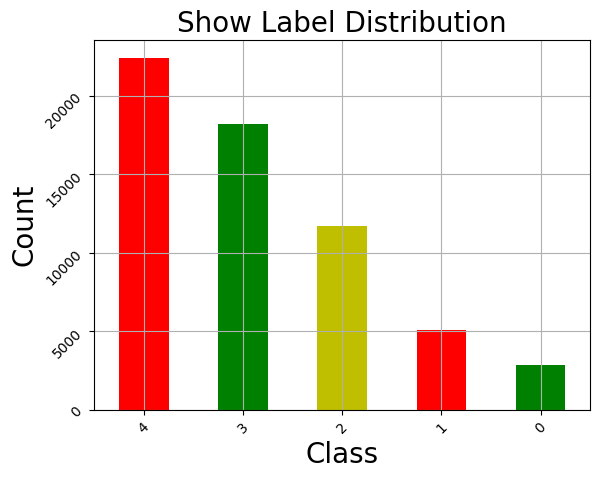

In [11]:
data.label.value_counts().plot.bar(color=['r','g','y'])
plt.title('Show Label Distribution',fontsize=20)
plt.xlabel('Class',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [12]:
stemmer= ISRIStemmer()
for i in ['يلعبون','العب','يلعب']:
    print(i,'->',stemmer.stem(i))

يلعبون -> لعب
العب -> لعب
يلعب -> لعب


In [13]:
def pre_processing(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove Arabic stopwords
    arabic_stopwords = set(stopwords.words("arabic"))
    tokens_words = [word for word in words if word not in arabic_stopwords]
    # Initialize an ISRI stemmer for Arabic
    stemmer = ISRIStemmer()
    stemmed_words = [stemmer.stem(word) for word in tokens_words]
    filtered_text = ' '.join(stemmed_words)
    # Remove digits
    text_without_digits = re.sub(r'\d', '',filtered_text)
    # Remove punctuation using regular expressions
    filtered_words =re.sub(r'[^\w\s]','', text_without_digits)
    #Remove Space
    filtered_text = ' '.join([word for word in filtered_words.split() if len(word) > 2])
    return filtered_text

In [14]:
data['text'][0]

' من أمتع ما قرأت من روايات بلا شك. وحول الشك تدندن (عزازيل) بلا هوادة. أحمد الديب 2008'

In [15]:
pre_processing(data['text'][0])

'متع قرأ روي بلا وحل الش دند عزازيل بلا هود حمد ديب'

In [16]:
data['text']=data['text'].apply(pre_processing)
data.head()

,label,text
0,3,متع قرأ روي بلا وحل الش دند عزازيل بلا هود حمد...
1,3,روي تخذ ارخ خار ؤلف فتر ارخ ندر نول روئ كتب بد...
2,0,اني قدر روي كثيرا سبب خلف سبب خرين انه علم درس...
3,4,كهن طلق نفس اسم هيب تيم علم وثن هيب قرت وشت ام...
4,4,عزازيل اسم روي وسف زيد ثني صدر ؤخر دار شرق جذب...


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data['text'],data['label'], test_size=0.30
                                                    , random_state=44, shuffle =True,stratify=data['label'])
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (42158,)
X_test shape is  (18068,)
y_train shape is  (42158,)
y_test shape is  (18068,)


In [18]:
X_train.to_csv('/content/drive/MyDrive/Colab Notebooks/LABR_PROJECT/preprocess/X_train.csv')
X_test.to_csv('/content/drive/MyDrive/Colab Notebooks/LABR_PROJECT/preprocess/X_test.csv')
y_train.to_csv('/content/drive/MyDrive/Colab Notebooks/LABR_PROJECT/preprocess/y_train.csv')
y_test.to_csv('/content/drive/MyDrive/Colab Notebooks/LABR_PROJECT/preprocess/y_test.csv')